---

# Data Analysis

Let's better understand what we're dealing with. What does the data look like?

---

In [106]:
import pandas as pd
import folium

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import matplotlib.dates as mdates

import matplotlib.colors as colors

In [107]:
# Load the data from the CSV files
data = pd.read_csv('csv/data_cleaned.csv')
target_data = pd.read_csv('csv/target_data.csv')


# Display the first few rows of each dataframe to verify the data

print("\nData:")
display(data)

print("Target Data:")
display(target_data)


Data:


,Date,EventCode,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,AvgTone
0,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
1,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
2,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
3,2024-12-12,90,"Chicago Club, Illinois, United States",41.8767,-87.6248,-8.141962
4,2024-12-12,90,"Chicago Club, Illinois, United States",41.8767,-87.6248,-8.141962
...,...,...,...,...,...,...
13713,2024-04-02,111,"Chicago, Illinois, United States",41.8500,-87.6501,1.865672
13714,2024-04-02,114,"Chicago, Illinois, United States",41.8500,-87.6501,-0.224162
13715,2024-04-02,145,"Chicago, Illinois, United States",41.8500,-87.6501,-5.401154
13716,2024-04-01,114,"Chicago, Illinois, United States",41.8500,-87.6501,-4.511278


Target Data:


,Date,EventCode,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,AvgTone
0,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
1,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
2,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
3,2024-12-12,90,"Chicago Club, Illinois, United States",41.8767,-87.6248,-8.141962
4,2024-12-12,90,"Chicago Club, Illinois, United States",41.8767,-87.6248,-8.141962
...,...,...,...,...,...,...
3753,2024-05-14,175,"School Of The Art Institute Of Chicago, Illino...",41.8789,-87.6217,-4.436229
3754,2024-05-14,141,"School Of The Art Institute Of Chicago, Illino...",41.8789,-87.6217,-4.436229
3755,2024-05-13,90,"Chicago Mercantile Exchange, Illinois, United ...",41.8814,-87.6376,-2.702703
3756,2024-05-07,175,"School Of The Art Institute Of Chicago, Illino...",41.8789,-87.6217,-4.253674


---

## Event Time 

Let's take a look at when the events occured.


---

---

## Re-Index by Date

Before we conduct analysis on thie data, we need to understand a crucial component of this data. Some days have more than 1 event, and other days have no events.

Let's try to understand how bad an event was. The column, "AvgTone" might be insightful.

### AvgTone

Here's the documentation
> (numeric) This is the average “tone” of all documents containing one or more
> mentions of this event. The score ranges from -100 (extremely negative) to +100 (extremely
> positive). Common values range between -10 and +10, with 0 indicating neutral. This can be
> used as a method of filtering the “context” of events as a subtle measure of the importance of
> an event and as a proxy for the “impact” of that event. For example, a riot event with a slightly
> negative average tone is likely to have been a minor occurrence, whereas if it had an extremely
> negative average tone, it suggests a far more serious occurrence. A riot with a positive score
> likely suggests a very minor occurrence described in the context of a more positive narrative
> (such as a report of an attack occurring in a discussion of improving conditions on the ground in
> a country and how the number of attacks per day has been greatly reduced).
[![GDELT Data Format Codebook](https://img.shields.io/badge/GDELT%20Data%20Format%20Codebook-Download-blue)](http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf)

Here it's clear that an event with a very negative value would be considered more **impactful**. I'm going to assume this is a proxy for more dangerious. The example mentioned supports this claim. Thus, the lower the "AvgTone," the worse the event was.


When we later analyze the AvgTone, we are going to want to investigate this on a daily basis. If there's more than 1 event, we'll take the sum of the AvgTone of all events on that day, to score that event. We'll call this Total AvgTone.

---

---

### Now let's reindex the data

---

---

All data

---

In [108]:
# Convert SQLDATE to datetime and aggregate data by date
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
aggregated = data.groupby('Date').agg({'EventCode': 'size', 'AvgTone': 'sum'}).reset_index()
aggregated.columns = ['Date', 'Number of Events', 'Total AvgTone']

# Create a date range and reindex the dataframe
all_dates = pd.date_range(start=aggregated['Date'].min(), end=pd.Timestamp.today())
reindexed_data = aggregated.set_index('Date').reindex(all_dates, fill_value=0).reset_index()

# Rename columns
reindexed_data.columns = ['Date', 'Number of Events', 'Total AvgTone']

# Display the resulting DataFrame
reindexed_data


,Date,Number of Events,Total AvgTone
0,2015-01-02,1,0.632911
1,2015-01-03,1,1.380898
2,2015-01-04,1,0.000000
3,2015-01-05,2,6.724782
4,2015-01-06,0,0.000000
...,...,...,...
3646,2024-12-26,17,-64.219322
3647,2024-12-27,13,-37.267035
3648,2024-12-28,15,-63.754482
3649,2024-12-29,0,0.000000


---

Only target data

---

In [109]:
# Convert SQLDATE to datetime and aggregate target_data by date
target_data['Date'] = pd.to_datetime(target_data['Date'], format='%Y-%m-%d')
aggregated = target_data.groupby('Date').agg({'EventCode': 'size', 'AvgTone': 'sum'}).reset_index()
aggregated.columns = ['Date', 'Number of Events', 'Total AvgTone']

# Create a date range and reindex the dataframe
all_dates = pd.date_range(start=aggregated['Date'].min(), end=pd.Timestamp.today())
reindexed_target_data = aggregated.set_index('Date').reindex(all_dates, fill_value=0).reset_index()

# Rename columns
reindexed_target_data.columns = ['Date', 'Number of Events', 'Total AvgTone']

# Display the resulting DataFrame
reindexed_target_data


,Date,Number of Events,Total AvgTone
0,2015-01-02,1,0.632911
1,2015-01-03,1,1.380898
2,2015-01-04,1,0.000000
3,2015-01-05,2,6.724782
4,2015-01-06,0,0.000000
...,...,...,...
3646,2024-12-26,0,0.000000
3647,2024-12-27,0,0.000000
3648,2024-12-28,0,0.000000
3649,2024-12-29,0,0.000000


---

## Graph the Data

---

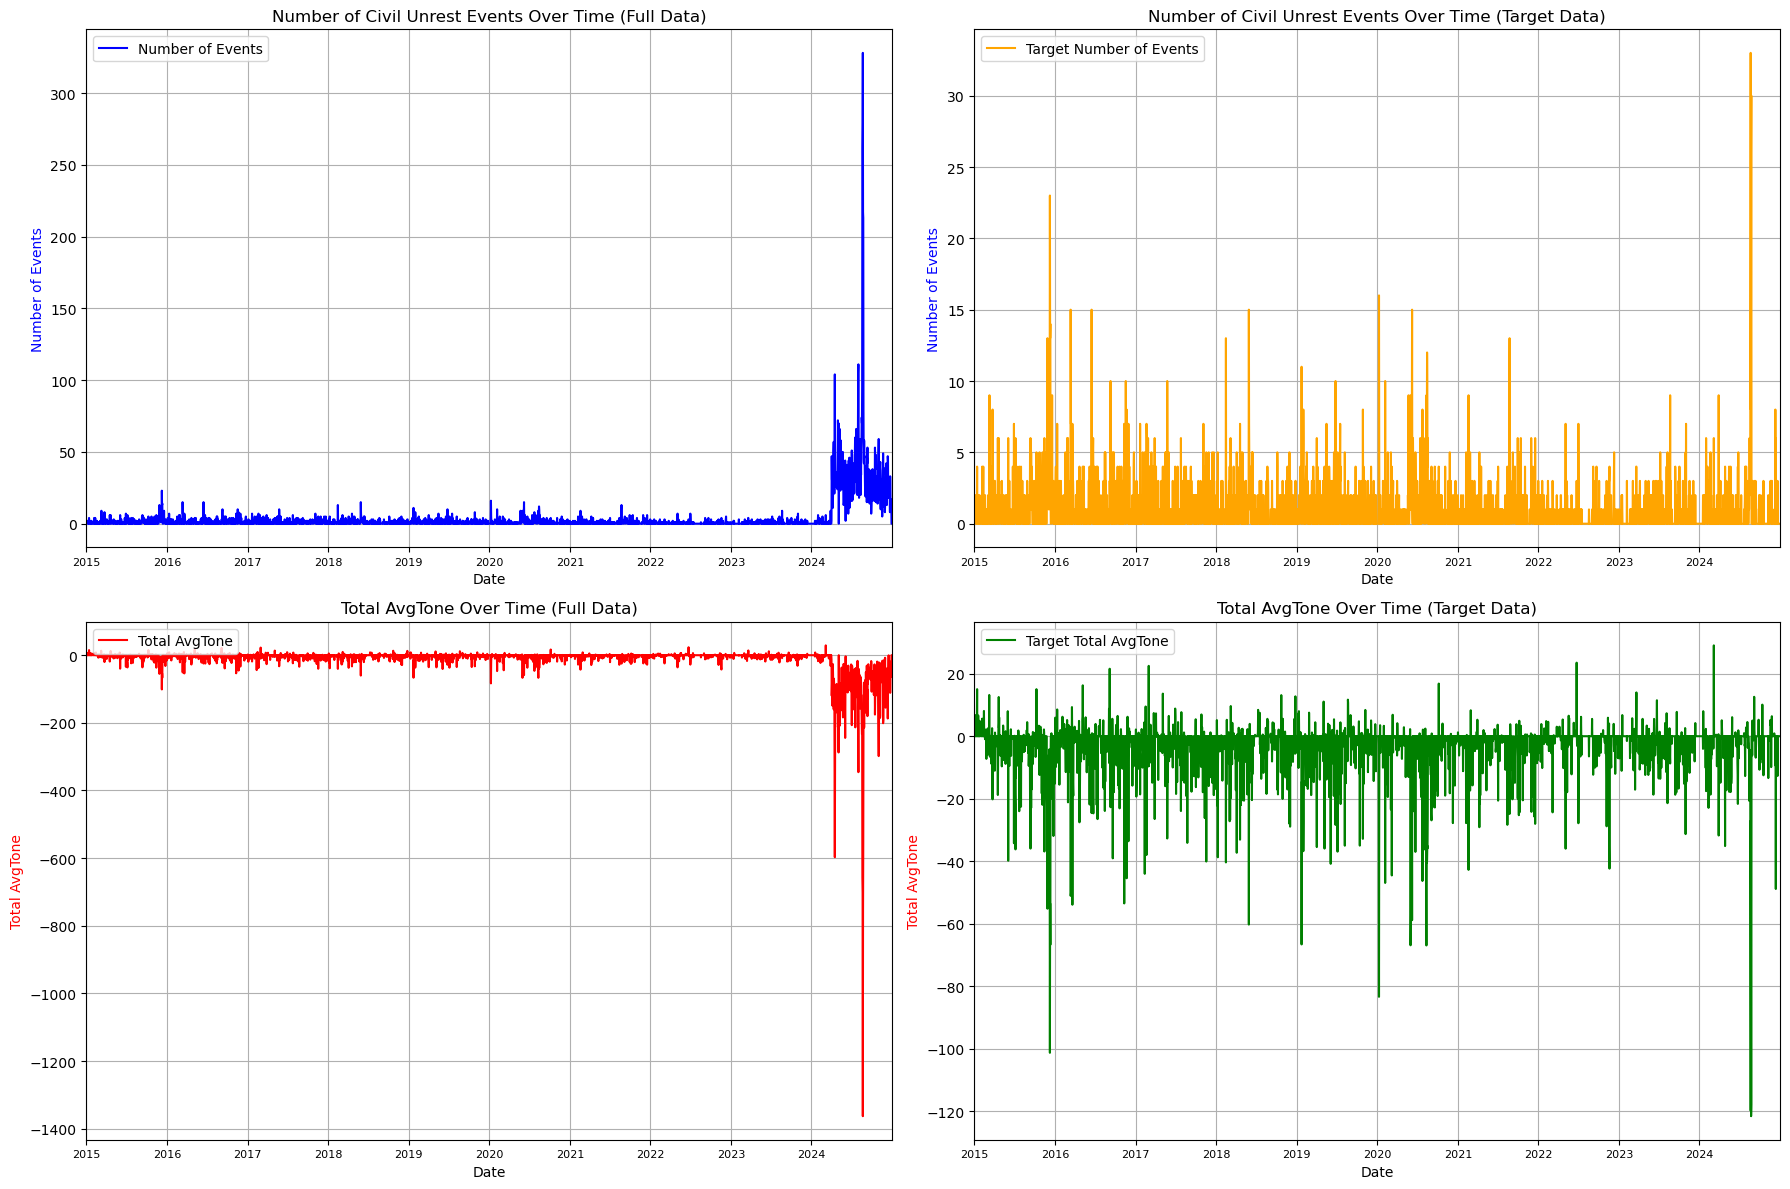

In [110]:
# Convert Date columns to datetime
reindexed_data['Date'] = pd.to_datetime(reindexed_data['Date'])
reindexed_target_data['Date'] = pd.to_datetime(reindexed_target_data['Date'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Define the date range for the x-axis
date_range = pd.date_range(start='2015-01-01', end='2024-12-31')

# Plot the number of events for full data
axes[0, 0].plot(reindexed_data['Date'], reindexed_data['Number of Events'], label='Number of Events', color='b')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Events', color='b')
axes[0, 0].set_title('Number of Civil Unrest Events Over Time (Full Data)')
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)
axes[0, 0].xaxis.set_major_locator(mdates.YearLocator())
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0, 0].tick_params(axis='x', labelsize=8)
axes[0, 0].set_xlim(date_range[0], date_range[-1])

# Plot the number of events for target data
axes[0, 1].plot(reindexed_target_data['Date'], reindexed_target_data['Number of Events'], label='Target Number of Events', color='orange')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Events', color='b')
axes[0, 1].set_title('Number of Civil Unrest Events Over Time (Target Data)')
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)
axes[0, 1].xaxis.set_major_locator(mdates.YearLocator())
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0, 1].tick_params(axis='x', labelsize=8)
axes[0, 1].set_xlim(date_range[0], date_range[-1])

# Plot the Total AvgTone for full data
axes[1, 0].plot(reindexed_data['Date'], reindexed_data['Total AvgTone'], label='Total AvgTone', color='r')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total AvgTone', color='r')
axes[1, 0].set_title('Total AvgTone Over Time (Full Data)')
axes[1, 0].legend(loc='upper left')
axes[1, 0].grid(True)
axes[1, 0].xaxis.set_major_locator(mdates.YearLocator())
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1, 0].tick_params(axis='x', labelsize=8)
axes[1, 0].set_xlim(date_range[0], date_range[-1])

# Plot the Total AvgTone for target data
axes[1, 1].plot(reindexed_target_data['Date'], reindexed_target_data['Total AvgTone'], label='Target Total AvgTone', color='green')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total AvgTone', color='r')
axes[1, 1].set_title('Total AvgTone Over Time (Target Data)')
axes[1, 1].legend(loc='upper left')
axes[1, 1].grid(True)
axes[1, 1].xaxis.set_major_locator(mdates.YearLocator())
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1, 1].tick_params(axis='x', labelsize=8)
axes[1, 1].set_xlim(date_range[0], date_range[-1])

plt.tight_layout()
plt.show()


---

The South Loop neighborhood in Chicago experienced significant protest activity during the summer of 2020, particularly in late May and early June, following the death of George Floyd. On May 30, 2020, protests escalated into unrest and looting, resulting in substantial damage to businesses in the South Loop. Reports indicate that on May 31, 2020, the area was left with major damage as it prepared for another night of protests.

---

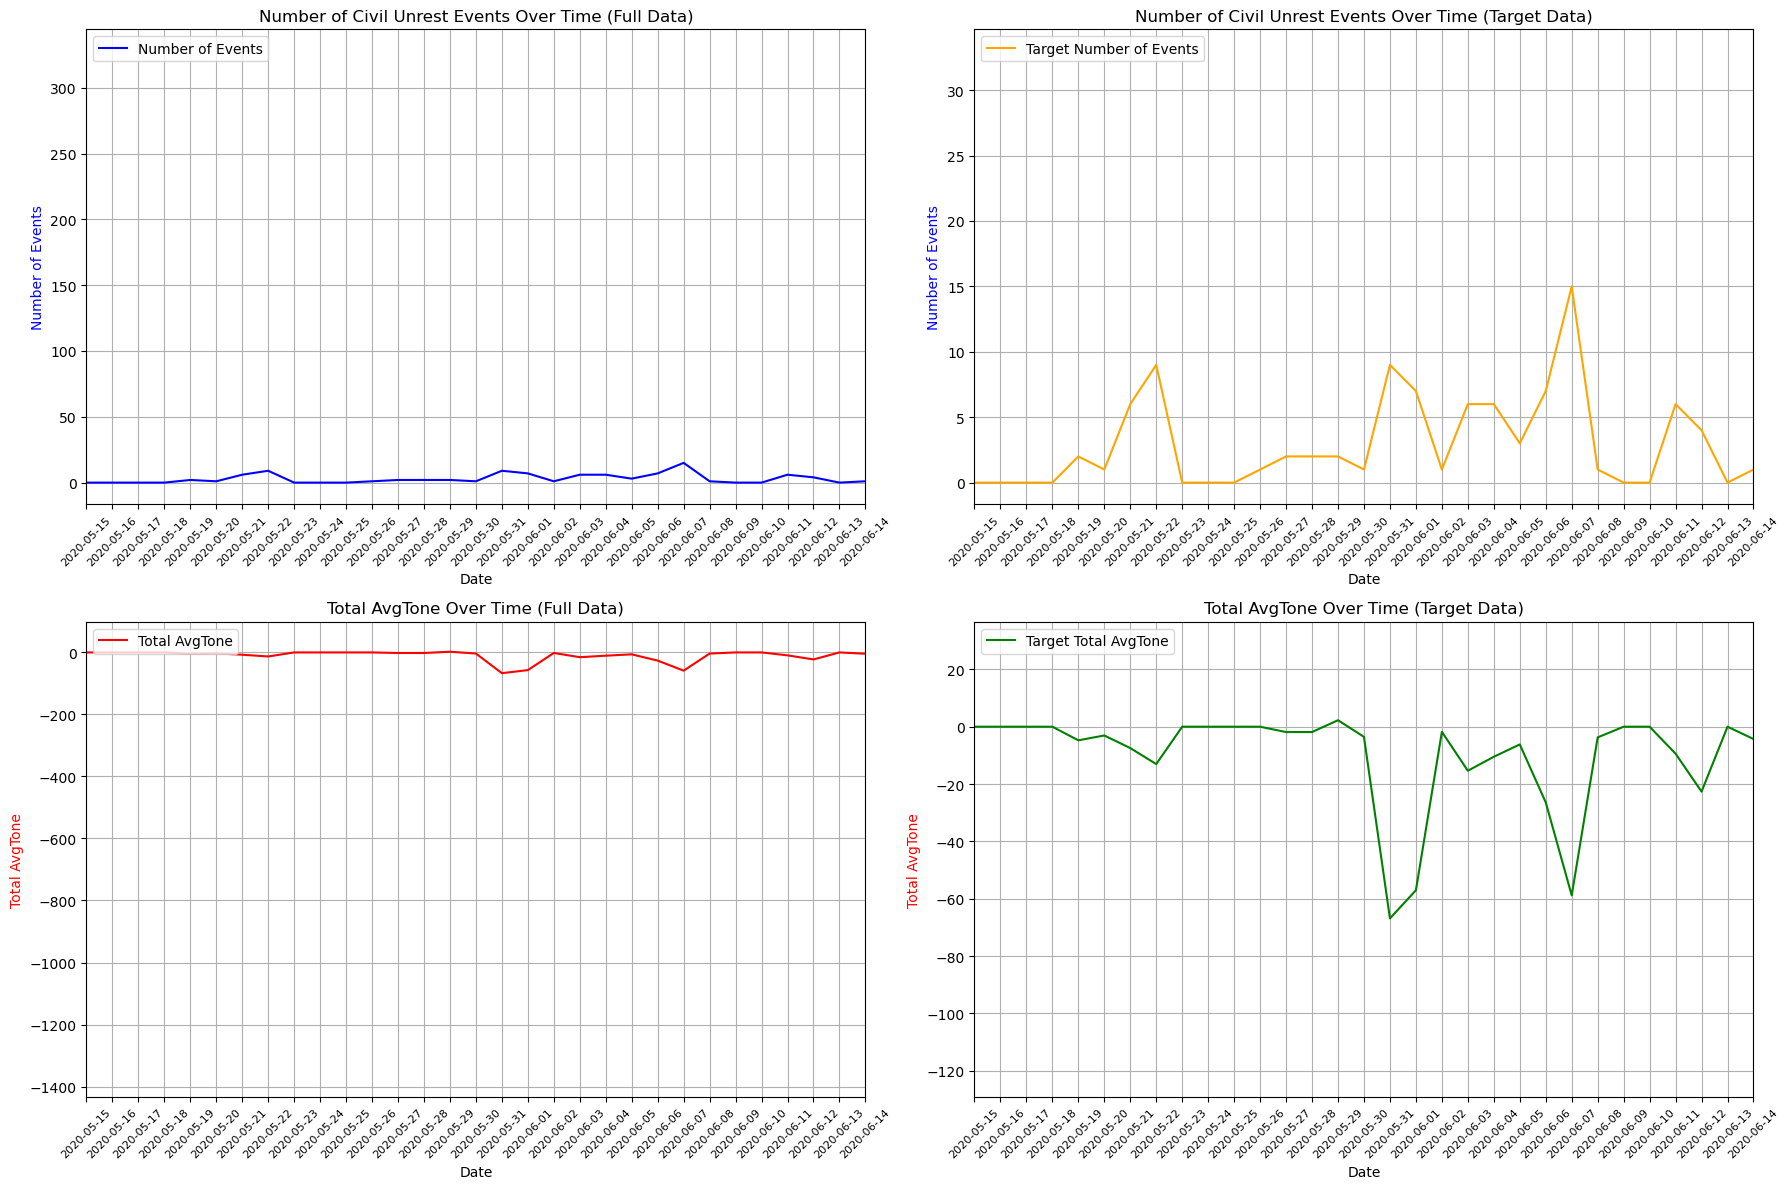

In [111]:
# Convert Date columns to datetime
reindexed_data['Date'] = pd.to_datetime(reindexed_data['Date'])
reindexed_target_data['Date'] = pd.to_datetime(reindexed_target_data['Date'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Define the date range for the x-axis
start_date = pd.to_datetime('2020-05-15')
end_date = pd.to_datetime('2020-06-14')

# Plot the number of events for full data
axes[0, 0].plot(reindexed_data['Date'], reindexed_data['Number of Events'], label='Number of Events', color='b')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Events', color='b')
axes[0, 0].set_title('Number of Civil Unrest Events Over Time (Full Data)')
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)
axes[0, 0].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0, 0].set_xlim(start_date, end_date)

# Plot the number of events for target data
axes[0, 1].plot(reindexed_target_data['Date'], reindexed_target_data['Number of Events'], label='Target Number of Events', color='orange')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Events', color='b')
axes[0, 1].set_title('Number of Civil Unrest Events Over Time (Target Data)')
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)
axes[0, 1].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 1].tick_params(axis='x', labelsize=8, rotation=45)
axes[0, 1].set_xlim(start_date, end_date)

# Plot the Total AvgTone for full data
axes[1, 0].plot(reindexed_data['Date'], reindexed_data['Total AvgTone'], label='Total AvgTone', color='r')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total AvgTone', color='r')
axes[1, 0].set_title('Total AvgTone Over Time (Full Data)')
axes[1, 0].legend(loc='upper left')
axes[1, 0].grid(True)
axes[1, 0].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 0].tick_params(axis='x', labelsize=8, rotation=45)
axes[1, 0].set_xlim(start_date, end_date)

# Plot the Total AvgTone for target data
axes[1, 1].plot(reindexed_target_data['Date'], reindexed_target_data['Total AvgTone'], label='Target Total AvgTone', color='green')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total AvgTone', color='r')
axes[1, 1].set_title('Total AvgTone Over Time (Target Data)')
axes[1, 1].legend(loc='upper left')
axes[1, 1].grid(True)
axes[1, 1].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1, 1].set_xlim(start_date, end_date)

plt.tight_layout()
plt.show()


---

## Event Total AvgTone Distribution

---

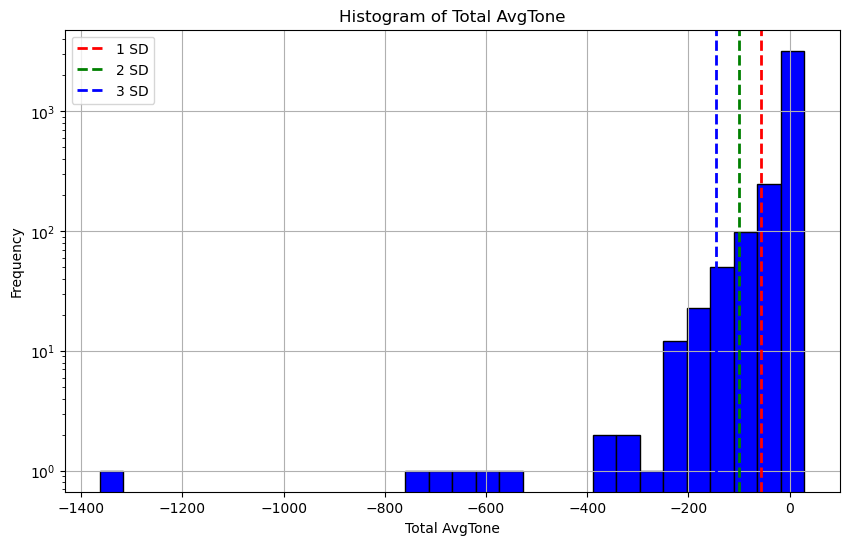

In [112]:
# Calculate mean and standard deviation
mean_avg_tone = reindexed_data['Total AvgTone'].mean()
std_avg_tone = reindexed_data['Total AvgTone'].std()

# Create a histogram of Total AvgTone with linear scale
plt.figure(figsize=(10, 6))
plt.hist(reindexed_data['Total AvgTone'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Total AvgTone')
plt.ylabel('Frequency')
plt.title('Histogram of Total AvgTone')
plt.yscale('log')
plt.grid(True)

# Add vertical lines for 1 SD, 2 SD, and 3 SD
plt.axvline(mean_avg_tone - std_avg_tone, color='r', linestyle='dashed', linewidth=2, label='1 SD')
plt.axvline(mean_avg_tone - 2 * std_avg_tone, color='g', linestyle='dashed', linewidth=2, label='2 SD')
plt.axvline(mean_avg_tone - 3 * std_avg_tone, color='b', linestyle='dashed', linewidth=2, label='3 SD')

# Add legend
plt.legend()
plt.show()


---

I included a logorithmic distribution of frequency becuase clearly most days in Chicago have very few events (thank God!). I also included the SD of AvgTone in the graph to help unpack the spread of the data. Note: this is not normally distributed, so SD only really conveys spread.

---


---

It's clear that Total AvgTone looks like an excellent data label for determining how "disruptive" an event was. 

Let's take a closer look at the peaks in the data

---

---

## Event Location

We've largely defined and understood our event locations.
* We've identified what makes for a "relevant" event, as it's proximal to our commute.

One area of consideration is to see which events occur at the same location. 

Let's make a map of the unqiue geographic areas, and then create a total avgtone scoring for each location, and then use a color tone to map the nimimum total avgtone for a loaciton as a dark red, and the max total avgtone as the lightest red.

---

---

### Re-Index Data by Location

Let's group together events that occur a the same location.

---

In [113]:
from matplotlib.colors import Normalize

# Group the data by location and calculate the total AvgTone for each location
location_data = data.groupby(['ActionGeo_Lat', 'ActionGeo_Long']).agg({'AvgTone': 'sum'}).reset_index()

# Print the number of unique locations
print(f"Number of unique locations: {location_data.shape[0]}")

Number of unique locations: 146


In [114]:
location_data

,ActionGeo_Lat,ActionGeo_Long,AvgTone
0,41.5061,-87.6356,-30.719799
1,41.6392,-87.4548,-47.977019
2,41.7228,-87.5364,-43.208874
3,41.7750,-87.6964,-8.715596
4,41.7890,-87.6043,-48.476272
...,...,...,...
141,41.9156,-87.6378,-3.096985
142,41.9178,-87.6514,-0.853259
143,41.9526,-87.6727,-86.333030
144,41.9796,-87.9045,-23.393213


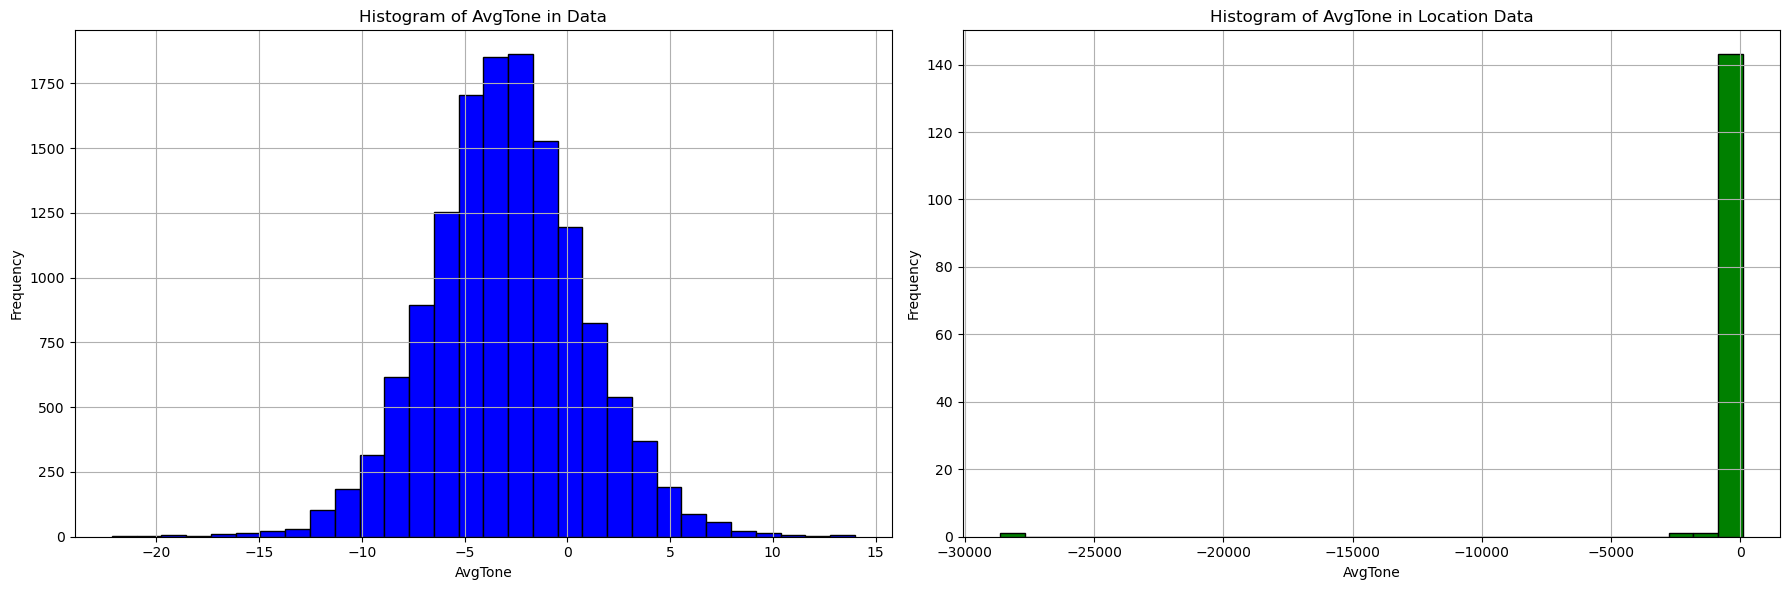

In [115]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram of AvgTone in data
axes[0].hist(data['AvgTone'], bins=30, color='blue', edgecolor='black')
axes[0].set_xlabel('AvgTone')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of AvgTone in Data')
axes[0].grid(True)

# Histogram of AvgTone in location_data
axes[1].hist(location_data['AvgTone'], bins=30, color='green', edgecolor='black')
axes[1].set_xlabel('AvgTone')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of AvgTone in Location Data')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [116]:
# Create a folium map centered around Chicago with zoom level 13
# Calculate the center of the bounds of the data
center_lat = data['ActionGeo_Lat'].mean()
center_long = data['ActionGeo_Long'].mean()

# Create a folium map centered around the calculated center with zoom level 13
m = folium.Map(location=[center_lat, center_long], zoom_start=13)

# Define the colormap and normalization for AvgTone, ensuring white is not an option
colormap = plt.get_cmap('Reds')
norm = Normalize(vmin=location_data['AvgTone'].min(), vmax=location_data['AvgTone'].max())

# Add markers for each unique location in the location_data DataFrame
for index, row in location_data.iterrows():
    # Calculate the radius based on the normalized AvgTone value (inverted to make lower AvgTone larger)
    radius = 200 * (1 - norm(row['AvgTone'])) + 50  # Increased radius and added a minimum size
    # Get the color based on the normalized AvgTone value, ensuring white is not an option
    color = colors.rgb2hex(colormap(norm(row['AvgTone'])))
    folium.Circle(
        location=[row['ActionGeo_Lat'], row['ActionGeo_Long']],
        radius=radius,
        color='black',  # Set the outline color to black
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Location, Total AvgTone: {row['AvgTone']}"
    ).add_to(m)

# Save and display the map
m.save("map.html")
m

---

There's certainly an outlier here. Let's isolate it.

---

In [117]:
from sklearn.cluster import DBSCAN

# Extract the relevant columns for clustering
X = location_data[['AvgTone']]

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=10, min_samples=2)

# Fit the model and predict clusters
location_data['Cluster'] = dbscan.fit_predict(X)

# Display the clustered data
location_data

,ActionGeo_Lat,ActionGeo_Long,AvgTone,Cluster
0,41.5061,-87.6356,-30.719799,0
1,41.6392,-87.4548,-47.977019,0
2,41.7228,-87.5364,-43.208874,0
3,41.7750,-87.6964,-8.715596,0
4,41.7890,-87.6043,-48.476272,0
...,...,...,...,...
141,41.9156,-87.6378,-3.096985,0
142,41.9178,-87.6514,-0.853259,0
143,41.9526,-87.6727,-86.333030,1
144,41.9796,-87.9045,-23.393213,0


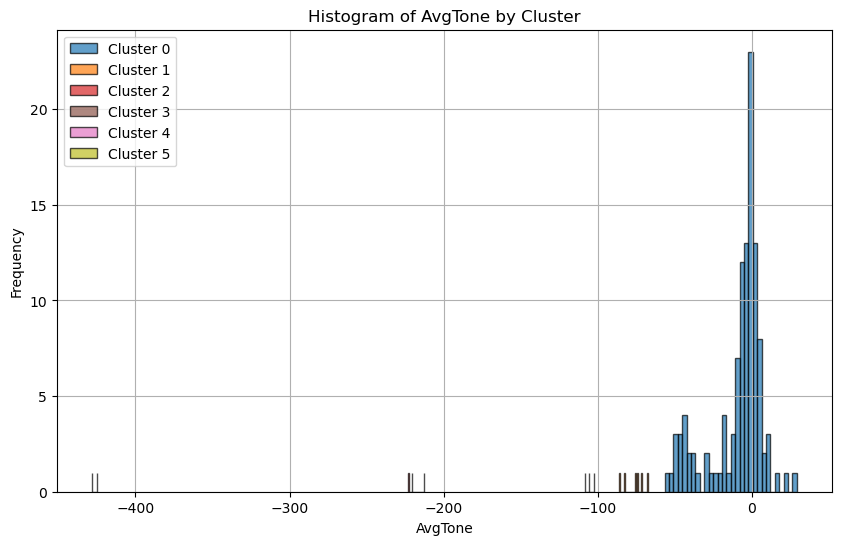

In [118]:
# Define the number of clusters
num_clusters = location_data['Cluster'].nunique()

# Define a color map for the clusters
colormap = plt.get_cmap('tab10')

# Create a figure for the histogram
plt.figure(figsize=(10, 6))

# Plot a histogram for each cluster
for cluster in range(num_clusters):
    cluster_data = location_data[location_data['Cluster'] == cluster]
    plt.hist(cluster_data['AvgTone'], bins=30, color=colormap(cluster / num_clusters), edgecolor='black', alpha=0.7, label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('AvgTone')
plt.ylabel('Frequency')
plt.title('Histogram of AvgTone by Cluster')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

---

Let's go ahead and check the distributions again.

---

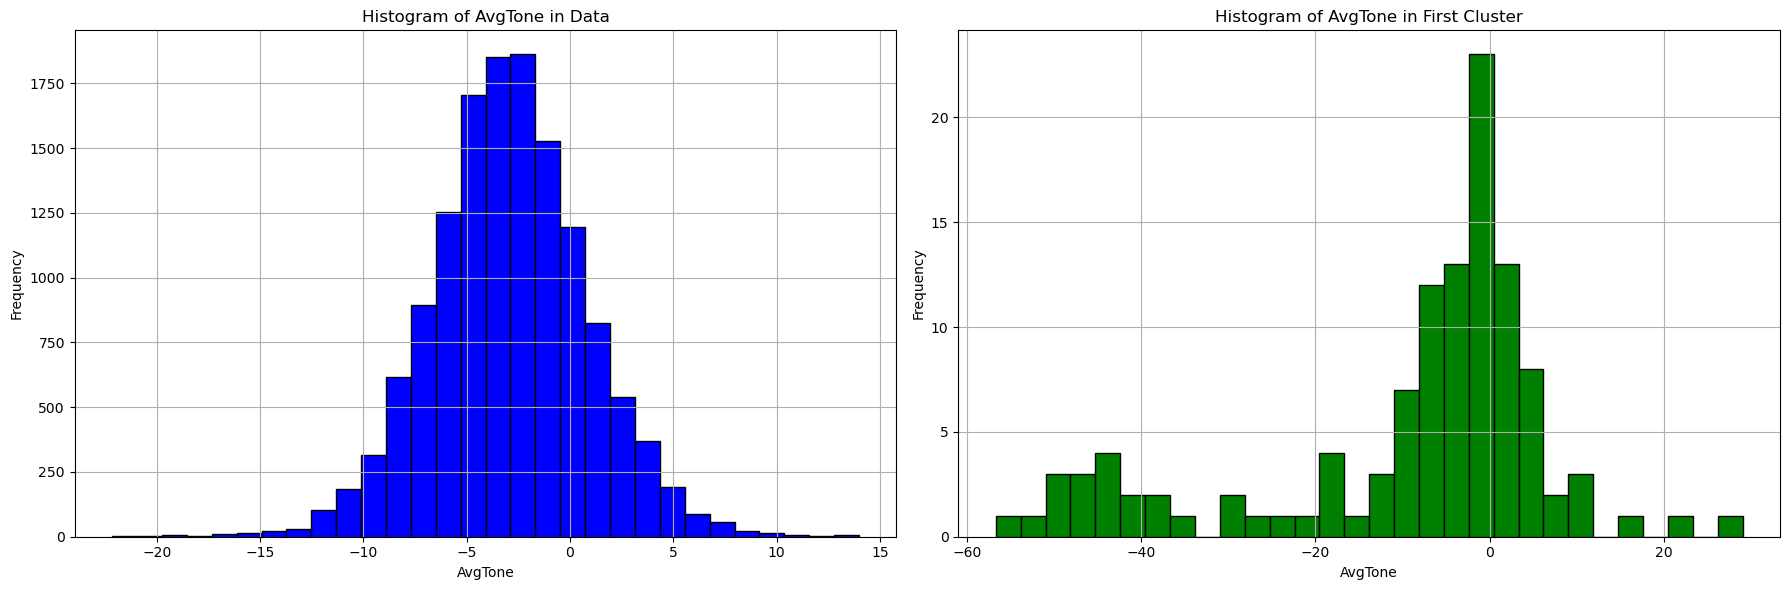

In [119]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram of AvgTone in data
axes[0].hist(data['AvgTone'], bins=30, color='blue', edgecolor='black')
axes[0].set_xlabel('AvgTone')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of AvgTone in Data')
axes[0].grid(True)

# Histogram of AvgTone in location_data for the first cluster
first_cluster_data = location_data[location_data['Cluster'] == 0]
axes[1].hist(first_cluster_data['AvgTone'], bins=30, color='green', edgecolor='black')
axes[1].set_xlabel('AvgTone')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of AvgTone in First Cluster')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

---

That's much more reasonable. Clearly some clustering, but it's not absurd. We'll need to explore that more later.

---

In [122]:
# Create a folium map centered around Chicago with zoom level 10
# Calculate the center of the bounds of the data
center_lat = data['ActionGeo_Lat'].mean()
center_long = data['ActionGeo_Long'].mean()

# Create a folium map centered around the calculated center with zoom level 13
m = folium.Map(location=[center_lat, center_long], zoom_start=13)

# Define the normalization for AvgTone using Normalize
colormap = plt.get_cmap('Reds')
norm = Normalize(vmin=location_data[location_data['Cluster'] == 0]['AvgTone'].min(), vmax=location_data[location_data['Cluster'] == 0]['AvgTone'].max())

# Add markers for each unique location in the location_data DataFrame
for index, row in location_data[location_data['Cluster'] == 0].iterrows():
    # Calculate the radius based on the normalized AvgTone value (inverted to make lower AvgTone larger)
    radius = 200 * (1 - norm(row['AvgTone'])) + 50  # Increased radius and added a minimum size
    # Get the color based on the normalized AvgTone value
    color = colors.rgb2hex(colormap(norm(row['AvgTone'])))
    folium.Circle(
        location=[row['ActionGeo_Lat'], row['ActionGeo_Long']],
        radius=radius,
        color='black',  # Set the outline color to black
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Location, Total AvgTone: {row['AvgTone']}"
    ).add_to(m)

# Save and display the map
m.save("map.html")
m

---

We'll return to unpack this outlier later, but now we can more clearly see the distribution. I wanted to see how the distribution was without the outlier skewing all the variable coloring / sizing of the events on the graph.

---

---

## Event Duplication

---

One other thing I want to check - is there any duplicate events at the same location?

---

In [121]:
# Check for duplicate events based on all columns
duplicate_events = data[data.duplicated()]

# Display the duplicate events based on all columns
print("Duplicate events based on all columns:")
display(duplicate_events)

Duplicate events based on all columns:


,Date,EventCode,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,AvgTone
1,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
2,2024-12-20,90,"Rush University, Illinois, United States",41.8736,-87.6695,-4.235318
4,2024-12-12,90,"Chicago Club, Illinois, United States",41.8767,-87.6248,-8.141962
5,2024-12-12,90,"Chicago Club, Illinois, United States",41.8767,-87.6248,-8.141962
7,2024-12-10,111,"Chicago Board Of Trade, Illinois, United States",41.8778,-87.6323,-2.441360
...,...,...,...,...,...,...
13706,2024-04-02,145,"Chicago, Illinois, United States",41.8500,-87.6501,-5.401154
13709,2024-04-02,241,"Chicago, Illinois, United States",41.8500,-87.6501,-4.458599
13711,2024-04-02,90,"Chicago, Illinois, United States",41.8500,-87.6501,-0.123377
13713,2024-04-02,111,"Chicago, Illinois, United States",41.8500,-87.6501,1.865672


---

This is rather odd. I'll revert to investigate more later.

---